<a href="https://colab.research.google.com/github/patrikLM10/NIR-Glucose-monitoring/blob/main/glucometer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

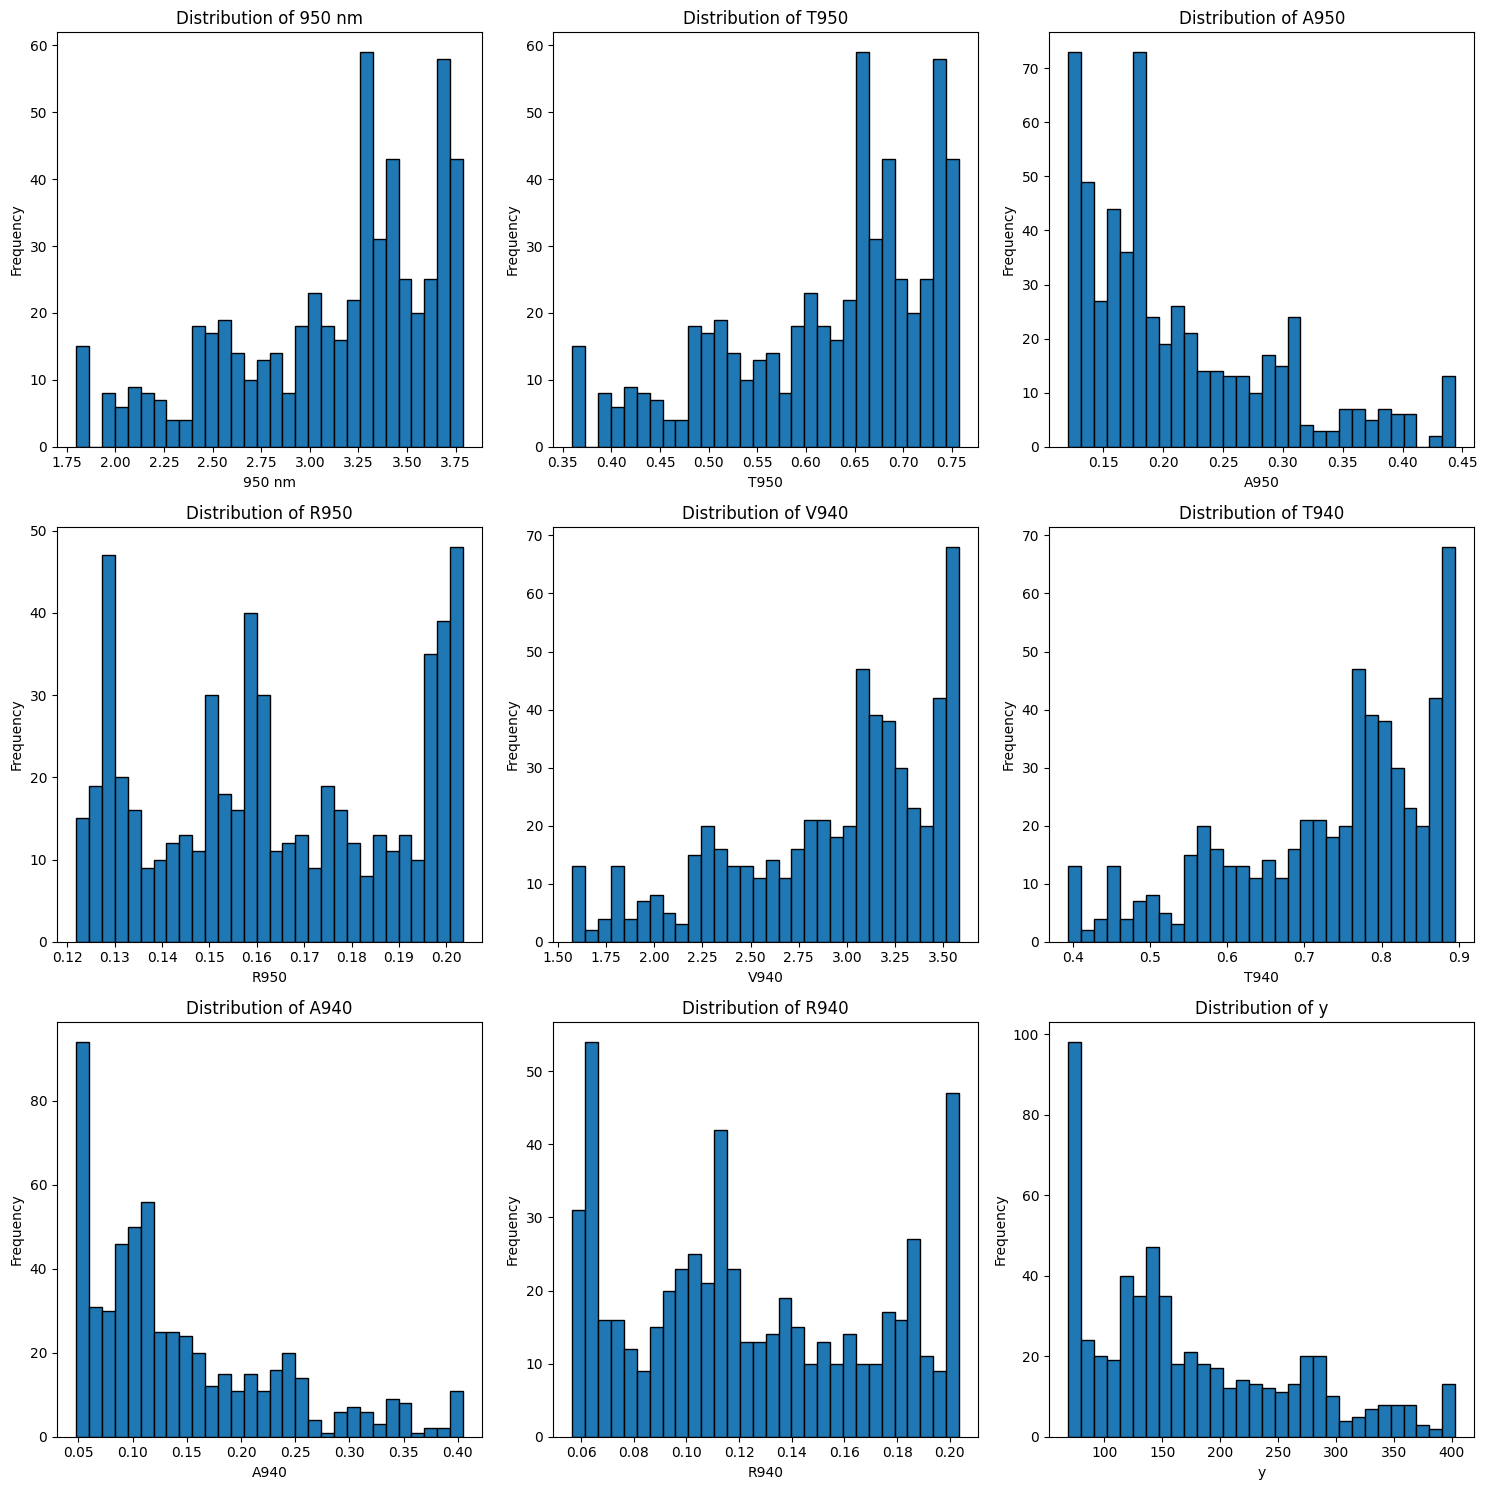

In [4]:
import matplotlib.pyplot as plt

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_columns.remove('C')

n_cols = 3
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    axes[i].hist(df[col], bins=30, edgecolor='black')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Reasoning**:
Create box plots for all numerical columns, grouped by the categorical column 'C', to visualize the distributions across different categories.



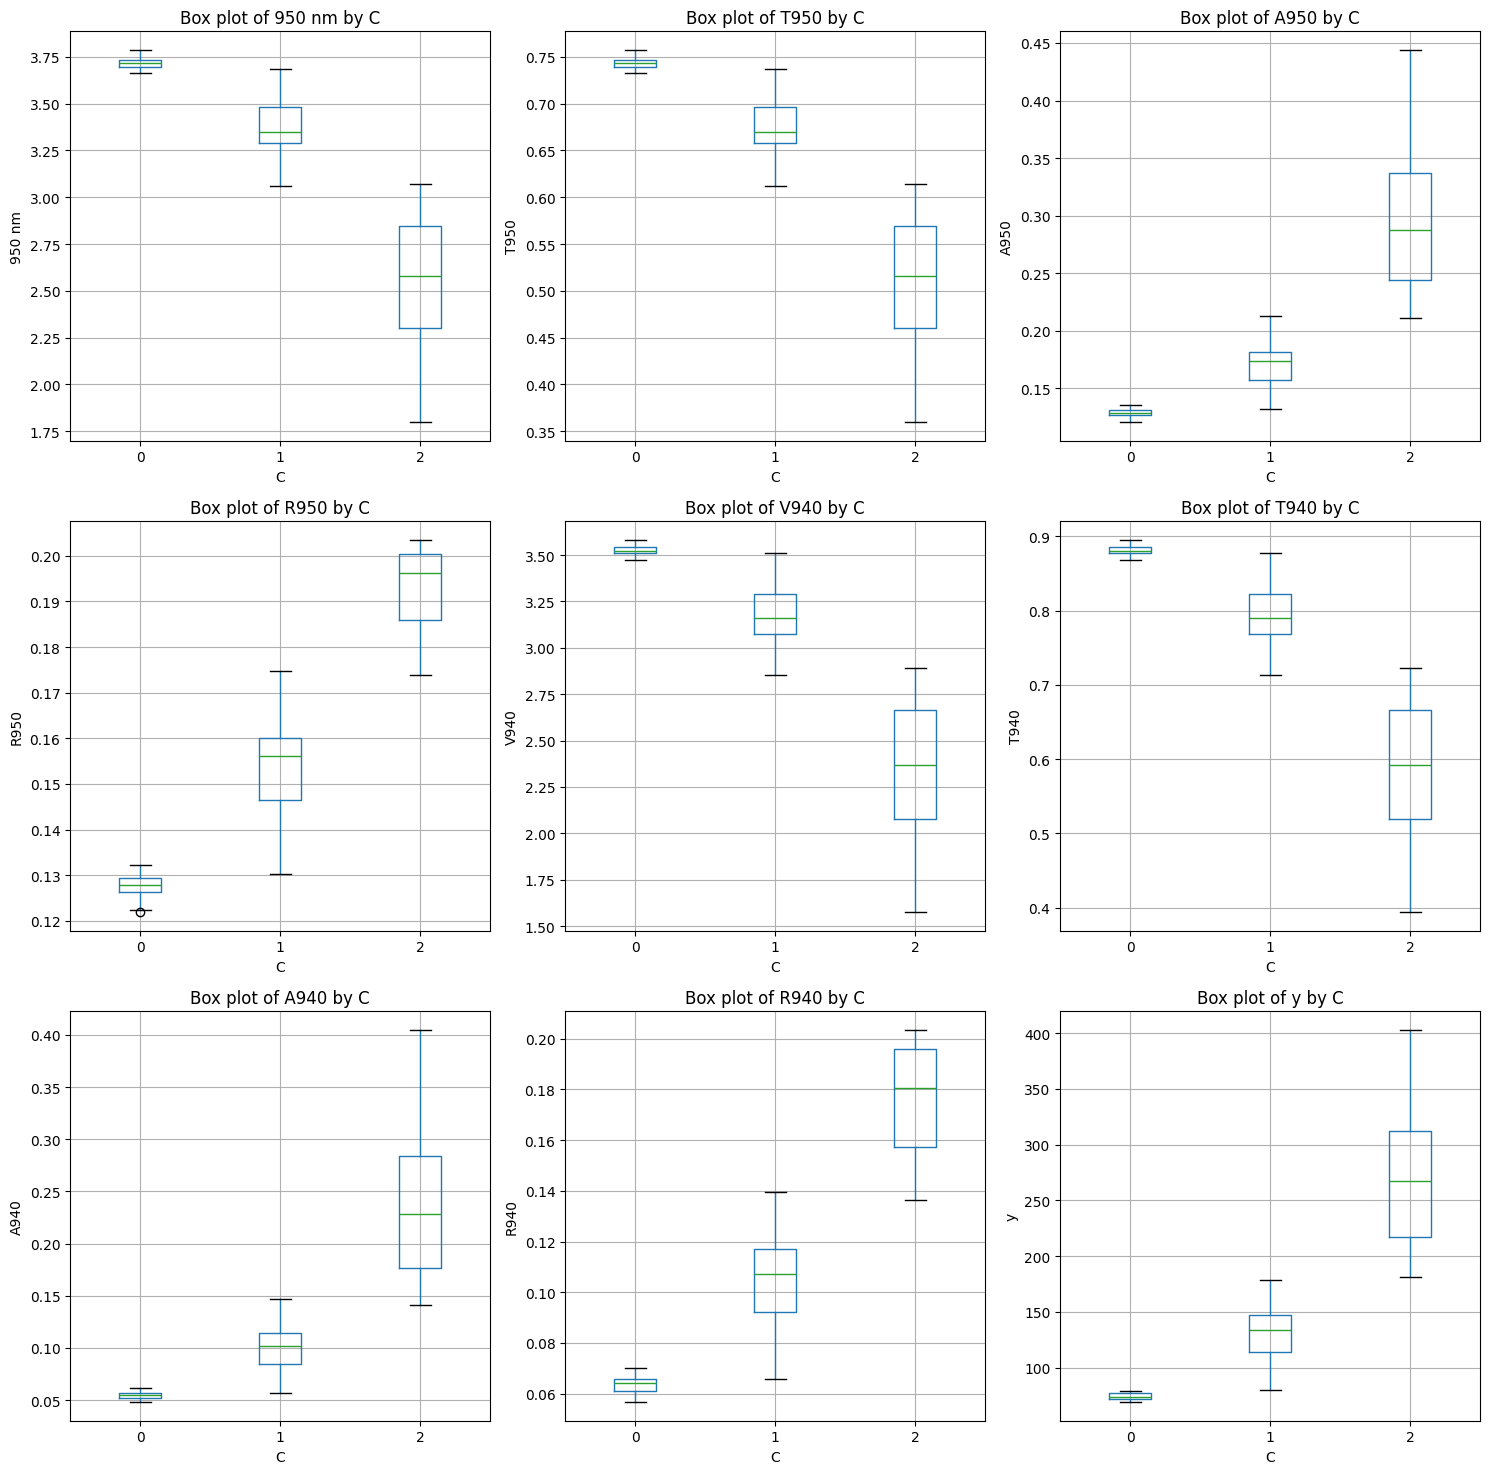

In [5]:
n_cols = 3
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    df.boxplot(column=col, by='C', ax=axes[i])
    axes[i].set_title(f'Box plot of {col} by C')
    axes[i].set_xlabel('C')
    axes[i].set_ylabel(col)
    plt.suptitle('')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Reasoning**:
Create scatter plots for pairs of numerical variables that might have interesting relationships to visualize their correlations.



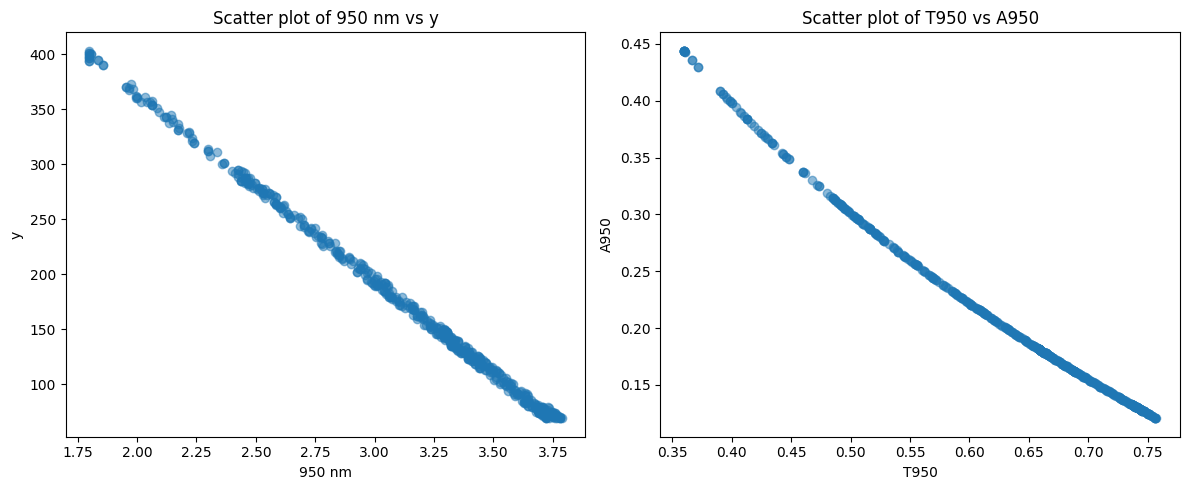

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(df['950 nm'], df['y'], alpha=0.5)
axes[0].set_title('Scatter plot of 950 nm vs y')
axes[0].set_xlabel('950 nm')
axes[0].set_ylabel('y')

axes[1].scatter(df['T950'], df['A950'], alpha=0.5)
axes[1].set_title('Scatter plot of T950 vs A950')
axes[1].set_xlabel('T950')
axes[1].set_ylabel('A950')

plt.tight_layout()
plt.show()

In [7]:
correlation_matrix = df.corr()
display(correlation_matrix)

grouped_means = df.groupby('C').mean()
display(grouped_means)

,950 nm,T950,A950,R950,V940,T940,A940,R940,y,C
950 nm,1.000000,1.000000,-0.995015,-0.950379,0.999141,0.999141,-0.993348,-0.976900,-0.999335,-0.854376
T950,1.000000,1.000000,-0.995015,-0.950379,0.999141,0.999141,-0.993348,-0.976900,-0.999335,-0.854376
A950,-0.995015,-0.995015,1.000000,0.914618,-0.994120,-0.994120,0.999196,0.951297,0.994928,0.813484
R950,-0.950379,-0.950379,0.914618,1.000000,-0.949691,-0.949691,0.910366,0.993102,0.947955,0.926258
V940,0.999141,0.999141,-0.994120,-0.949691,1.000000,1.000000,-0.994029,-0.978069,-0.998714,-0.854170
T940,0.999141,0.999141,-0.994120,-0.949691,1.000000,1.000000,-0.994029,-0.978069,-0.998714,-0.854170
A940,-0.993348,-0.993348,0.999196,0.910366,-0.994029,-0.994029,1.000000,0.949501,0.993510,0.809226
R940,-0.976900,-0.976900,0.951297,0.993102,-0.978069,-0.978069,0.949501,1.000000,0.975361,0.911490
y,-0.999335,-0.999335,0.994928,0.947955,-0.998714,-0.998714,0.993510,0.975361,1.000000,0.851928
C,-0.854376,-0.854376,0.813484,0.926258,-0.854170,-0.854170,0.809226,0.911490,0.851928,1.000000


,950 nm,T950,A950,R950,V940,T940,A940,R940,y
C,,,,,,,,,
0,3.720210,0.744042,0.128416,0.127542,3.529859,0.882465,0.054315,0.063220,74.125000
1,3.374652,0.674930,0.171185,0.153885,3.177862,0.794466,0.100449,0.105086,130.892720
2,2.544357,0.508871,0.298167,0.192961,2.346360,0.586590,0.237419,0.175992,271.477064


In [15]:
# Load dataset with proper header handling
df = pd.read_csv("clas.csv", header=None)  # Set header=0 if the first row is a header

# Check for non-numeric values in the first row
if df.iloc[0].dtype == object:
    print("First row contains non-numeric values (headers?). Remove them or use header=0.")
    # Drop the first row if it contains headers
    df = df.drop(0).reset_index(drop=True)

# Convert all columns to numeric
df = df.apply(pd.to_numeric, errors='coerce')

# Features (first 8 columns) and target (9th column: glucose values)
X = df.iloc[:, :8].values
y = df.iloc[:, 8].values  # Glucose values for regression

First row contains non-numeric values (headers?). Remove them or use header=0.


In [20]:
%pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.4 MB/s eta 0:00:00


In [22]:
%pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 kB 20.5 MB/s eta 0:00:00


In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import GlorotUniform
from tensorflow.keras import regularizers
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

# ——— Load your dataframe here ———
# df = pd.read_csv("clas.csv", header=None)  # adjust if needed

# Features (first 8 cols) and target (9th col)
X = df.iloc[:, :8].values
y = df.iloc[:, 8].values

# Train/test split (75/25)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Z‑score normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

# Build the FFNN matching the paper
model = Sequential([
    Dense(
        64, activation='relu',
        input_shape=(X_train.shape[1],),
        kernel_initializer=GlorotUniform(),
        kernel_regularizer=regularizers.l2(1e-4)
    ),
    Dense(
        16, activation='relu',
        kernel_initializer=GlorotUniform(),
        kernel_regularizer=regularizers.l2(1e-4)
    ),
    Dense(1, activation='linear')  # explicit linear output
])

# Compile with Adam + MSE
model.compile(
    optimizer='adam',
    loss='mse'
)

# Train for 200 epochs, batch size 32
history = model.fit(
    X_train, y_train,
    epochs=250,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Predict on test set
y_pred = model.predict(X_test).flatten()

# Compute metrics
mse  = mean_squared_error(y_test, y_pred)
mae  = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
r2   = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R²: {r2:.4f}")
print(f"MSE: {mse:.4f} (mg/dL)²")
print(f"MAE: {mae:.4f} mg/dL")
print(f"MAPE: {mape:.2f}%")
print(f"RMSE: {rmse:.4f} mg/dL")


Epoch 1/250
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 175ms/step - loss: 37313.3398 - val_loss: 42283.1641
Epoch 2/250
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 37974.5039 - val_loss: 42014.7344
Epoch 3/250
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 36474.6172 - val_loss: 41738.8672
Epoch 4/250
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 39120.2148 - val_loss: 41402.1445
Epoch 5/250
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 36118.0273 - val_loss: 40999.1680
Epoch 6/250
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 33954.6484 - val_loss: 40479.6172
Epoch 7/250
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 37502.7773 - val_loss: 39803.8633
Epoch 8/250
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 33913.6992 - val_loss: 38982.5820
Epoch 9/250
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 34965.0078 - val_loss: 37932.4531
Epoch 10/250
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 32790.6758 - val_loss: 36698.2539
Epoch 11/250
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - los

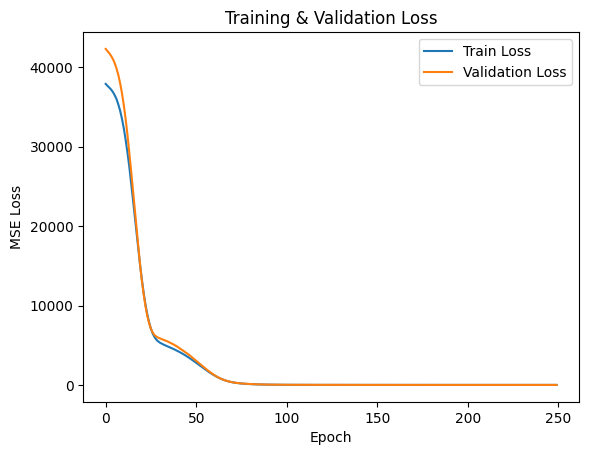

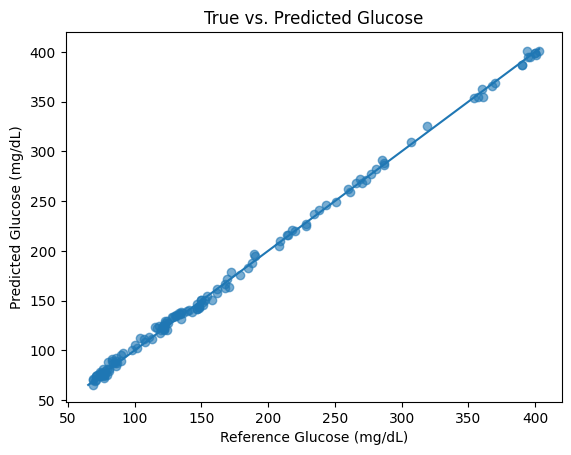

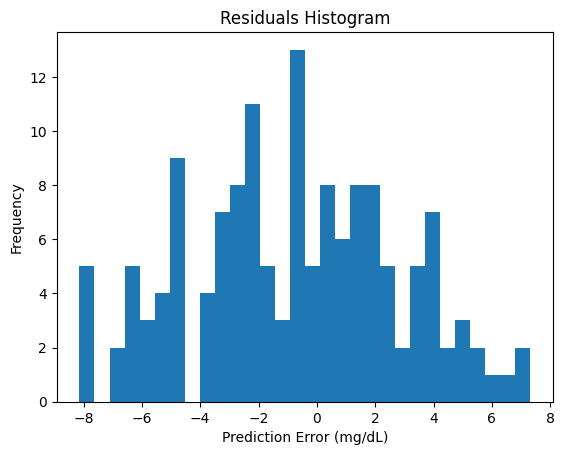

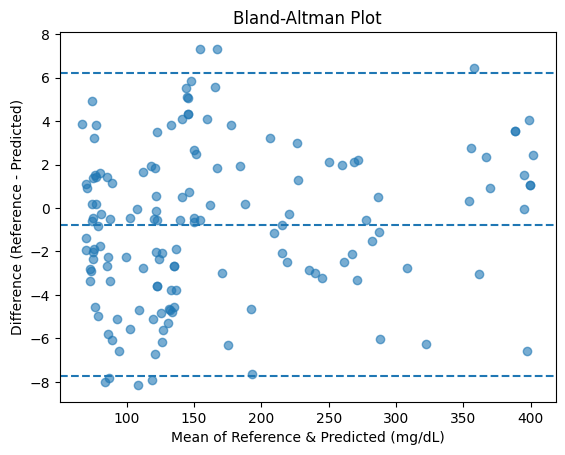

Model saved to: /content/ffnn_glucose_model_folder/ffnn_glucose_model.h5
R²: 0.9986
MSE: 13.1911 (mg/dL)²
MAE: 2.9771 mg/dL
MAPE: 2.32%
RMSE: 3.6319 mg/dL
Metrics saved to: /content/ffnn_glucose_model_folder/ffnn_metrics.txt


In [45]:
import os
import matplotlib.pyplot as plt

# 1. Save the model
model_path = '/content/ffnn_glucose_model_folder/ffnn_glucose_model.h5' # Added .h5 extension
model.save(model_path)

# 2. Plot training & validation loss over epochs
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

# 3. True vs. Predicted scatter
plt.figure()
plt.scatter(y_test, y_pred, alpha=0.6)
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val])
plt.title('True vs. Predicted Glucose')
plt.xlabel('Reference Glucose (mg/dL)')
plt.ylabel('Predicted Glucose (mg/dL)')
plt.show()

# 4. Residual histogram
residuals = y_test - y_pred
plt.figure()
plt.hist(residuals, bins=30)
plt.title('Residuals Histogram')
plt.xlabel('Prediction Error (mg/dL)')
plt.ylabel('Frequency')
plt.show()

# 5. Bland-Altman plot
mean_vals = (y_test + y_pred) / 2
diff_vals = y_test - y_pred
mean_diff = diff_vals.mean()
std_diff = diff_vals.std()

plt.figure()
plt.scatter(mean_vals, diff_vals, alpha=0.6)
plt.axhline(mean_diff, linestyle='--')
plt.axhline(mean_diff + 1.96 * std_diff, linestyle='--')
plt.axhline(mean_diff - 1.96 * std_diff, linestyle='--')
plt.title('Bland-Altman Plot')
plt.xlabel('Mean of Reference & Predicted (mg/dL)')
plt.ylabel('Difference (Reference - Predicted)')
plt.show()

# Provide link to saved model
print(f"Model saved to: {model_path}")
print(f"R²: {r2:.4f}")
print(f"MSE: {mse:.4f} (mg/dL)²")
print(f"MAE: {mae:.4f} mg/dL")
print(f"MAPE: {mape:.2f}%")
print(f"RMSE: {rmse:.4f} mg/dL")

# Save metrics to a file in the model folder
metrics_path = os.path.join('/content/ffnn_glucose_model_folder', 'ffnn_metrics.txt')
with open(metrics_path, 'w') as f:
    f.write(f"R²: {r2:.4f}\n")
    f.write(f"MSE: {mse:.4f} (mg/dL)²\n")
    f.write(f"MAE: {mae:.4f} mg/dL\n")
    f.write(f"MAPE: {mape:.2f}%\n")
    f.write(f"RMSE: {rmse:.4f} mg/dL\n")

print(f"Metrics saved to: {metrics_path}")

In [33]:
import pandas as pd
import numpy as np
import optuna
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# 1) Load data
df = pd.read_csv("clas.csv")  # adjust path/header as needed
X = df.iloc[:, :8].values
y = df.iloc[:, 8].values

# 2) Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# 3) LightGBM objective (no early stopping here)
def lgbm_objective(trial):
    params = {
        'num_leaves': trial.suggest_int('num_leaves', 16, 128),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 10.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 10.0),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'random_state': 42
    }
    model = LGBMRegressor(**params)
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    rmses = []
    for train_idx, val_idx in kf.split(X_train):
        X_tr, X_val = X_train[train_idx], X_train[val_idx]
        y_tr, y_val = y_train[train_idx], y_train[val_idx]
        model.fit(X_tr, y_tr)  # simple fit
        preds = model.predict(X_val)
        rmses.append(mean_squared_error(y_val, preds, squared=False))
    return np.mean(rmses)

# 4) CatBoost objective (early stopping works here)
def catboost_objective(trial):
    params = {
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 0.3),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-8, 10.0),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'random_state': 42,
        'verbose': False
    }
    model = CatBoostRegressor(**params)
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    rmses = []
    for train_idx, val_idx in kf.split(X_train):
        X_tr, X_val = X_train[train_idx], X_train[val_idx]
        y_tr, y_val = y_train[train_idx], y_train[val_idx]
        model.fit(
            X_tr, y_tr,
            eval_set=(X_val, y_val),
            early_stopping_rounds=50
        )
        preds = model.predict(X_val)
        rmses.append(mean_squared_error(y_val, preds, squared=False))
    return np.mean(rmses)

# 5) Run Optuna studies
print("Tuning LightGBM…")
lgbm_study = optuna.create_study(direction='minimize')
lgbm_study.optimize(lgbm_objective, n_trials=50, show_progress_bar=True)

print("\nTuning CatBoost…")
cat_study = optuna.create_study(direction='minimize')
cat_study.optimize(catboost_objective, n_trials=50, show_progress_bar=True)

# 6) Train final models
best_lgbm = LGBMRegressor(**lgbm_study.best_params)
best_lgbm.fit(X_train, y_train)

best_cat = CatBoostRegressor(**cat_study.best_params)
best_cat.fit(X_train, y_train)

# 7) Evaluate on test set
for name, model in [('LightGBM', best_lgbm), ('CatBoost', best_cat)]:
    preds = model.predict(X_test)
    mse  = mean_squared_error(y_test, preds)
    mae  = mean_absolute_error(y_test, preds)
    mape = mean_absolute_percentage_error(y_test, preds) * 100
    r2   = r2_score(y_test, preds)
    rmse = mean_squared_error(y_test, preds, squared=False)
    print(f"\n{name} performance:")
    print(f"  R²   = {r2:.4f}")
    print(f"  MSE  = {mse:.4f} (mg/dL)²")
    print(f"  MAE  = {mae:.4f} mg/dL")
    print(f"  MAPE = {mape:.2f}%")
    print(f"  RMSE = {rmse:.4f} mg/dL")


[I 2025-06-26 06:12:23,204] A new study created in memory with name: no-name-486f9d4e-a20d-41a3-9aa1-379962fa2924


Tuning LightGBM…


  0%|          | 0/50 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

[I 2025-06-26 06:12:49,016] A new study created in memory with name: no-name-82046f94-f1be-4054-a667-eb13927ae110


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-06-26 06:12:54,917] Trial 0 finished with value: 3.3812659129798406 and parameters: {'depth': 8, 'learning_rate': 0.08711506557684125, 'l2_leaf_reg': 3.2475678750714003e-06, 'border_count': 120, 'bagging_temperature': 0.5651213642739444, 'n_estimators': 590}. Best is trial 0 with value: 3.3812659129798406.
[I 2025-06-26 06:12:59,121] Trial 1 finished with value: 18.503812601140773 and parameters: {'depth': 7, 'learning_rate': 0.005089355482402229, 'l2_leaf_reg': 0.0007626312749234767, 'border_count': 209, 'bagging_temperature': 0.2177227104653946, 'n_estimators': 321}. Best is trial 0 with value: 3.3812659129798406.
[I 2025-06-26 06:13:09,219] Trial 2 finished with value: 3.5370521555409047 and parameters: {'depth': 10, 'learning_rate': 0.17595845104757063, 'l2_leaf_reg': 0.0009641581575944742, 'border_count': 212, 'bagging_temperature': 0.2981533509134412, 'n_estimators': 987}. Best is trial 0 with value: 3.3812659129798406.
[I 2025-06-26 06:13:10,499] Trial 3 finished with va